<hr>
<h2 style="color:#ae5a41;">Creation Dataframe Start</h2>
<hr>

In [3]:
import pandas as pd

whr21 = pd.read_csv('world-happiness-report-2021.csv')
whr = pd.read_csv('world-happiness-report.csv')

## INCORPORATION DE LA VARIABLE REGION DANS LE DATASET
region_map=whr21[['Country name','Regional indicator']]

whr=whr.merge(region_map,on='Country name',how='left')
whr[whr['Regional indicator'].isna()]['Country name'].unique()
whr['Regional indicator'].unique()

region_indic={'Angola':'Sub-Saharan Africa',
              'Belize':'Latin America and Caribbean',
              'Bhutan':'South Asia',
              'Central African Republic':'Sub-Saharan Africa',
              'Congo (Kinshasa)':'Sub-Saharan Africa',
              'Djibouti':'Sub-Saharan Africa',
              'Guyana':'Latin America and Caribbean',
              'Qatar':'Middle East and North Africa',
              'Somalia':'Sub-Saharan Africa',
              'Somaliland region':'Sub-Saharan Africa',
              'South Sudan':'Sub-Saharan Africa',
              'Sudan':'Sub-Saharan Africa',
              'Suriname':'Latin America and Caribbean',
              'Syria':'South Asia',
              'Trinidad and Tobago':'Latin America and Caribbean',
              'Cuba':'Latin America and Caribbean', 
              'Oman':'Middle East and North Africa'}

for i, country in enumerate(whr['Country name']):
    if country in region_indic:
        whr.loc[i,'Regional indicator']=region_indic[country]
        
## SIMPLIFICATION DU NOM DES COLONNES
        
whr = whr.rename(columns={'Regional indicator': 'Region', 
                          'Healthy life expectancy at birth': 'LifeExpectancy',
                          'Freedom to make life choices': 'Freedom',
                          'Perceptions of corruption': 'Corruption', 
                          'Country name':'Country',
                          'year':'Year',
                          'Social support':'SocialSupport',
                          'Log GDP per capita':'LogGDP',
                          'Positive affect':'PosAffect',
                          'Negative affect':'NegAffect'
                          })

whr = topia(whr)

whr_NoNA = whr.dropna()

whr_NoNA.head()

,Country,Year,Life Ladder,LogGDP,SocialSupport,LifeExpectancy,Freedom,Generosity,Corruption,PosAffect,NegAffect,Region
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258,South Asia
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237,South Asia
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275,South Asia
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267,South Asia
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268,South Asia


In [4]:
def utopia(df):
    """
    Description : Create an utopia country based on all the numeric values
    Input : dataframe with columns 'Country', 'Region', 'Year' and only numeric columns
    Output : dataframe utopia of the utopia country by Year with all the numeric values
    """
    df_utopia = df.drop(['Country','Region'], axis=1)
    df_utopia = df_utopia.groupby(by="Year",as_index=False).max()
    df_utopia['Country'] = 'Utopia' 
    df_utopia['Region'] = 'Topia' 
    
    return df_utopia

def distopia(df):
    """
    Description : Create an distopia country based on all the numeric values
    Input : dataframe with columns 'Country', 'Region', 'Year' and only numeric columns
    Output : dataframe distopia of the distopia country by Year with all the numeric values
    """
    df_distopia = df.drop(['Country','Region'], axis=1)
    df_distopia = df_distopia.groupby(by="Year",as_index=False).min()
    df_distopia['Country'] = 'Distopia' 
    df_distopia['Region'] = 'Topia' 

    return df_distopia

def topia(df):
    """
    Description : Add to a dataframe an distopia country and an utopia country based on all the numeric values
    Input : dataframe with columns 'Country', 'Region', 'Year' and only numeric columns
    Output : input dataframe with the utopia and disptopia countries added
    """
    df_utopia = utopia(df)
    df_distopia = distopia(df)
    df_topia = df.append(df_utopia)
    df_topia = df_topia.append(df_distopia)
    df_topia = df_topia.reset_index()
    df_topia = df_topia.drop(['index'], axis=1)
    
    return df_topia

<hr>
<h2 style="color:#ae5a41;">Regression</h2>
<hr>
Apprentissage sup -> regression : OK <br>
Apprentissage sup -> classification -> ordinale : OK <br>
Apprentissage sup -> classification -> cardinal : NOK <br>

<hr>
<h2 style="color:#ae5a41;">Regression all num</h2>
<hr>

In [5]:
from sklearn import model_selection, preprocessing
from sklearn.model_selection import cross_val_predict, cross_val_score, cross_validate
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

whr_num = whr_NoNA.drop(['Country','Region'], axis=1)

data = whr_num.drop('Life Ladder', axis=1)
target = whr_num['Life Ladder']

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=123)

In [6]:
# Insérez votre code ici 
lr = LinearRegression()
lr.fit(X_train, y_train)

# Insérez votre code ici 
coeffs = list(lr.coef_)
coeffs.insert(0, lr.intercept_)

feats = list(data.columns)
feats.insert(0, 'intercept')

pd.DataFrame({'valeur estimée': coeffs}, index=feats)

,valeur estimée
intercept,19.366730
Year,-0.010879
LogGDP,0.391708
SocialSupport,1.805174
LifeExpectancy,0.024555
Freedom,0.487749
Generosity,0.438327
Corruption,-0.740632
PosAffect,1.989751
NegAffect,0.417112


In [7]:
# Insérez votre code ici 
print('Coefficient de détermination du modèle :', lr.score(X_train, y_train))
print('Coefficient de détermination obtenu par Cv :', cross_val_score(lr,X_train,y_train).mean())

Coefficient de détermination du modèle : 0.7866268369199017
Coefficient de détermination obtenu par Cv : 0.7830286533828112


In [8]:
# Insérez votre code ici 
lr.score(X_test, y_test)

0.7941989845956609

le score est bizarre, légere amelioration avec les utopia et distopia0.233000

In [9]:
# Insérez votre code ici 
pred_train = lr.predict(X_train)
pred_test = lr.predict(X_test)

In [10]:
df_check = pd.DataFrame({'life_obsérvés': y_test, 'life_predits' : pred_test}, 
             index=X_test.index)
df_check['error'] = df_check['life_predits']-df_check['life_obsérvés']
df_check

,life_obsérvés,life_predits,error
469,5.081,5.770933,0.689933
681,3.570,3.867421,0.297421
12,4.634,5.019341,0.385341
1649,7.375,7.140573,-0.234427
281,4.741,4.074726,-0.666274
...,...,...,...
853,5.923,6.498335,0.575335
549,4.100,4.440613,0.340613
813,7.332,6.334242,-0.997758
1764,5.607,5.384119,-0.222881


In [ ]:
# regarder error = quels pays?

In [11]:
df_check["index"]=df_check.index

df_country = whr_NoNA[["Country","Region","Year"]]
df_country["index"] = df_country.index

df_check = df_check.merge(df_country, on="index", how="inner")
df_check = df_check.sort_values(by=['error'])

/tmp/ipykernel_17004/4277456275.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_country["index"] = df_country.index


In [12]:
df_check

,life_obsérvés,life_predits,error,index,Country,Region,Year
147,7.320,5.905491,-1.414509,1114,Mexico,Latin America and Caribbean,2012
166,7.401,6.064848,-1.336152,808,Israel,Middle East and North Africa,2014
228,6.740,5.458004,-1.281996,517,El Salvador,Latin America and Caribbean,2010
20,5.267,3.996615,-1.270385,1316,Pakistan,South Asia,2011
37,6.981,5.925516,-1.055484,226,Brazil,Latin America and Caribbean,2014
...,...,...,...,...,...,...,...
174,3.875,5.190419,1.315419,235,Bulgaria,Central and Eastern Europe,2011
162,2.688,4.112984,1.424984,1667,Syria,South Asia,2013
285,4.435,5.882998,1.447998,1626,Sri Lanka,South Asia,2018
320,6.033,7.602144,1.569144,1530,Singapore,Southeast Asia,2016


In [13]:
# Plot 

from bokeh.io import output_notebook, show
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource,LabelSet, Label, CategoricalColorMapper
from bokeh.models.tools import HoverTool
from bokeh.transform import factor_cmap
from bokeh.palettes import Category10_10
from bokeh.models import Range1d

output_notebook()

source = ColumnDataSource(data={'Error':df_check['error'].values,
                                'life_obsérvés':df_check['life_obsérvés'].values,
                                'Country':df_check['Country'].values,
                                'Region_color': df_check['Region'].values,
                                'Year':df_check['Year'].values}) 

color_mapper = CategoricalColorMapper(factors=df_check['Region'].unique(), palette=Category10_10)

p = figure(plot_width = 1000, plot_height = 600)
p.circle(x = 'Error', y= 'life_obsérvés', size = 15, color = {'field': 'Region_color', 'transform': color_mapper},
             source = source,  legend_field='Region_color', fill_alpha = 0.2)

p.add_tools(HoverTool(tooltips=[("Error", "$x"),("life_obsérvés", "$y"), ("Country", "@Country"), ("Year", "@Year")]))
p.xaxis.axis_label = 'Error'
p.yaxis.axis_label = 'life_obsérvés'
p.add_layout(LabelSet(x='Error', y='life_obsérvés', text='Country',text_font_size='6pt',
                  x_offset=0, y_offset=5, source=source, render_mode='canvas'))
p.legend.location = "top_right" 
#p.legend.orientation = "horizontal"
p.x_range = Range1d(-2, 2)
p.y_range = Range1d(1, 10)

from bokeh.models import BoxAnnotation
green_box = BoxAnnotation(left=-0.5, right=0.5, fill_color='green', fill_alpha=0.1)
p.add_layout(green_box)

show(p)

Loading BokehJS ...

In [14]:
df_check_mean = df_check.groupby(by=["Country"],as_index=False).mean()
df_check_mean = df_check_mean.merge(df_country[["Country","Region"]].drop_duplicates(), on="Country", how="inner")

# Plot 

from bokeh.io import output_notebook, show
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource,LabelSet, Label, CategoricalColorMapper
from bokeh.models.tools import HoverTool
from bokeh.transform import factor_cmap
from bokeh.palettes import Category10_10
from bokeh.models import Range1d

output_notebook()

source = ColumnDataSource(data={'Error':df_check_mean['error'].values,
                                'life_obsérvés':df_check_mean['life_obsérvés'].values,
                                'Country':df_check_mean['Country'].values,
                                'Region_color': df_check_mean['Region'].values}) 

color_mapper = CategoricalColorMapper(factors=df_check_mean['Region'].unique(), palette=Category10_10)

p = figure(plot_width = 1000, plot_height = 600)
p.circle(x = 'Error', y= 'life_obsérvés', size = 15, color = {'field': 'Region_color', 'transform': color_mapper},
             source = source,  legend_field='Region_color', fill_alpha = 0.2)

p.add_tools(HoverTool(tooltips=[("Error", "$x"),("life_obsérvés", "$y"), ("Country", "@Country")]))
p.xaxis.axis_label = 'Error'
p.yaxis.axis_label = 'life_obsérvés'
p.add_layout(LabelSet(x='Error', y='life_obsérvés', text='Country',text_font_size='6pt',
                  x_offset=0, y_offset=5, source=source, render_mode='canvas'))
p.legend.location = "top_right" 
#p.legend.orientation = "horizontal"
p.x_range = Range1d(-2, 2)
p.y_range = Range1d(1, 10)

from bokeh.models import BoxAnnotation
green_box = BoxAnnotation(left=-0.5, right=0.5, fill_color='green', fill_alpha=0.1)
p.add_layout(green_box)

show(p)

Loading BokehJS ...

Europe : Filand, Norway, Portugal<br>
South A : **Pakistan**, Bangladesh, Afga, **Sri Lanka**<br>
East A : Japan<br>
Central EU : Estonie, Bulgarie<br>
Middle E : Isreal, **Bahrain**<br>
Southeast A : **Myanmar, Cambodia**<br>
Latin Am : Panama, Brazil, Mexico, El Salvador, Guatemala, Guyana, Belize<br>
Sub-africa : Congo B, Congo K, Mozambique, **Burundi**, Namibia, Lesotho, Uganda, **Tanzania, Kenya, Botswana, Rwanda**<br>

Europe : Filand, Portugal<br>
South A : **Pakistan**, **Sri Lanka** + Syria<br>
East A : Japan?<br>
Central EU : Bulgarie<br>
Middle E : Isreal, **Bahrain**<br>
Southeast A : **Myanmar, Cambodia**<br>
Latin Am : Brazil, Mexico, El Salvador<br>
Sub-africa : Congo K, Mozambique, **Burundi**, **Tanzania**<br>

No handles with labels found to put in legend.


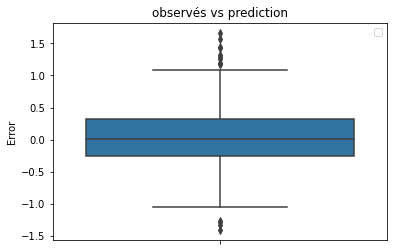

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

#plt.scatter(df_check.index,df_check[['error']],label='y_test', linewidth=2)
sns.boxplot(y='error', data=df_check)

plt.ylabel('Error')
plt.title('observés vs prediction')
plt.legend();

In [16]:
df_check.describe()

,life_obsérvés,life_predits,error,index,Year
count,348.000000,348.000000,348.000000,348.000000,348.000000
mean,5.466816,5.510456,0.043640,998.089080,2013.270115
std,1.143533,0.982111,0.516923,581.333497,4.094211
min,2.688000,2.738631,-1.414509,0.000000,2005.000000
25%,4.667250,4.842225,-0.249555,478.000000,2010.000000
50%,5.447500,5.505168,0.012540,1053.000000,2013.000000
75%,6.244500,6.103537,0.316322,1497.250000,2017.000000
max,8.019000,7.767182,1.666304,1975.000000,2020.000000


Le score est entre 0 et 10 theoriquement et entre 2 et 8 réellement.<br>
Nous avons des différences de +/- 1.5 soit de 15% theorique et 25% reel.

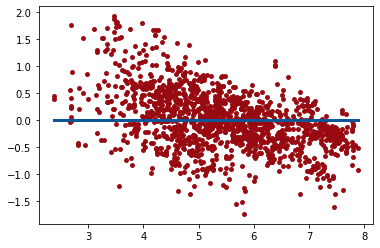

In [17]:
residus = pred_train - y_train

plt.scatter(y_train, residus, color='#980a10', s=15)
plt.plot((y_train.min(), y_train.max()), (0, 0), lw=3, color='#0a5798')

In [18]:
df_check = pd.DataFrame({'life_obsérvés': y_test, 'life_predits' : pred_test}, 
             index=X_test.index)
df_check['error'] = df_check['life_predits']-df_check['life_obsérvés']
df_check

df_check["index"]=df_check.index
whr_NoNA["index"]=whr_NoNA.index

df_error = df_check.merge(whr_NoNA, on="index", how="inner")
df_error = df_error.sort_values(by=['error'])
df_error

/tmp/ipykernel_17004/3994851620.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  whr_NoNA["index"]=whr_NoNA.index


,life_obsérvés,life_predits,error,index,Country,Year,Life Ladder,LogGDP,SocialSupport,LifeExpectancy,Freedom,Generosity,Corruption,PosAffect,NegAffect,Region
147,7.320,5.905491,-1.414509,1114,Mexico,2012,7.320,9.832,0.767,66.86,0.788,-0.093,0.633,0.784,0.278,Latin America and Caribbean
166,7.401,6.064848,-1.336152,808,Israel,2014,7.401,10.533,0.889,72.64,0.707,0.094,0.818,0.604,0.271,Middle East and North Africa
228,6.740,5.458004,-1.281996,517,El Salvador,2010,6.740,8.900,0.757,64.20,0.669,-0.064,0.694,0.814,0.302,Latin America and Caribbean
20,5.267,3.996615,-1.270385,1316,Pakistan,2011,5.267,8.276,0.510,56.42,0.376,0.030,0.857,0.628,0.358,South Asia
37,6.981,5.925516,-1.055484,226,Brazil,2014,6.981,9.664,0.898,65.54,0.714,-0.115,0.710,0.788,0.274,Latin America and Caribbean
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174,3.875,5.190419,1.315419,235,Bulgaria,2011,3.875,9.795,0.860,65.80,0.664,-0.228,0.948,0.534,0.271,Central and Eastern Europe
162,2.688,4.112984,1.424984,1667,Syria,2013,2.688,8.396,0.585,58.76,0.455,0.225,0.663,0.387,0.622,South Asia
285,4.435,5.882998,1.447998,1626,Sri Lanka,2018,4.435,9.462,0.833,67.20,0.859,0.106,0.856,0.831,0.302,South Asia
320,6.033,7.602144,1.569144,1530,Singapore,2016,6.033,11.419,0.925,76.20,0.904,0.143,0.047,0.824,0.111,Southeast Asia


/tmp/ipykernel_7099/3956821122.py:10: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  'SocialSupport','LogGDP','PosAffect','NegAffect']].corr(), dtype=np.bool))


Text(0.5, 1.0, 'df_error')

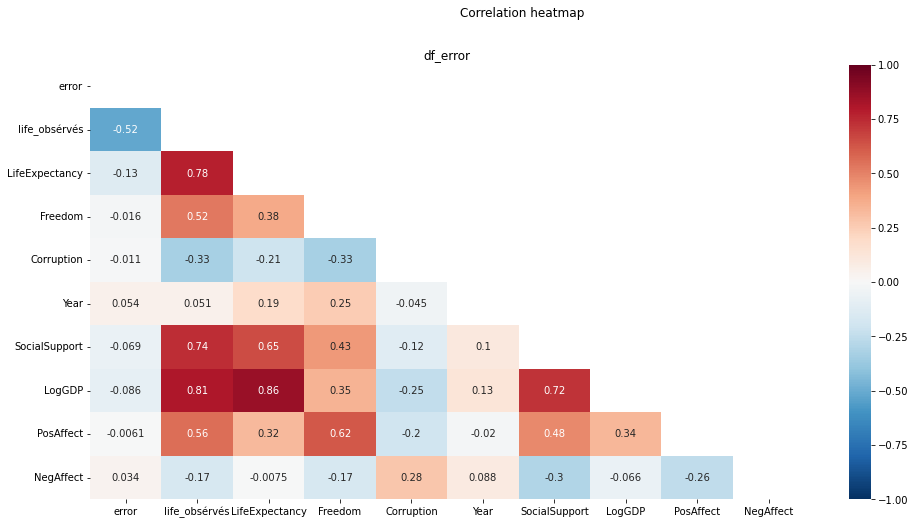

In [68]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots( figsize=(16, 8))
fig.suptitle('Correlation heatmap')

mask = np.triu(np.ones_like(df_error[['error','life_obsérvés','LifeExpectancy','Freedom','Corruption','Year',
                          'SocialSupport','LogGDP','PosAffect','NegAffect']].corr(), dtype=np.bool))
sns.heatmap(ax=ax, data=df_error[['error','life_obsérvés','LifeExpectancy','Freedom','Corruption','Year',
                          'SocialSupport','LogGDP','PosAffect','NegAffect']].corr(), 
            annot=True,vmin=-1, vmax=1, cmap='RdBu_r', center=0, mask=mask);
ax.set_title("df_error")

<hr>
<h2 style="color:#ae5a41;">Regression signif_features</h2>
<hr>

In [15]:
# Insérez votre code ici 
signif_features = ['LogGDP','LifeExpectancy','SocialSupport']

In [16]:
# Insérez votre code ici 
lr2 = LinearRegression()
lr2.fit(X_train[signif_features], y_train)
 
print(lr2.score(X_train[signif_features], y_train))
print(lr2.score(X_test[signif_features], y_test))

0.690665160349254
0.7066104235249142


In [17]:
pred_train2 = lr2.predict(X_train[signif_features])
pred_test2 = lr2.predict(X_test[signif_features])

In [18]:
df_check2 = pd.DataFrame({'life_obsérvés': y_test, 'life_predits' : pred_test2}, 
             index=X_test.index)
df_check2['error'] = df_check2['life_predits']-df_check2['life_obsérvés']
df_check2

,life_obsérvés,life_predits,error
620,7.312,6.603572,-0.708428
1495,5.489,4.569367,-0.919633
1520,3.447,3.828091,0.381091
128,4.556,4.650569,0.094569
495,6.128,5.762995,-0.365005
...,...,...,...
1010,5.711,6.199337,0.488337
1240,4.944,5.311531,0.367531
142,5.719,5.987062,0.268062
445,6.736,6.419445,-0.316555


No handles with labels found to put in legend.


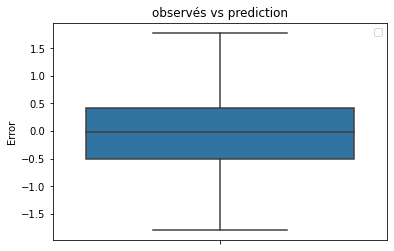

In [19]:
sns.boxplot(y='error', data=df_check2)

plt.ylabel('Error')
plt.title('observés vs prediction')
plt.legend();

In [20]:
# Insérez votre code ici 
from sklearn.feature_selection import SelectFromModel

lr = LinearRegression()
sfm = SelectFromModel(lr)

scaler = preprocessing.StandardScaler().fit(X_train)

X_train_scaled = scaler.transform(X_train)

X_test_scaled = scaler.transform(X_test)

sfm_train = sfm.fit_transform(X_train_scaled, y_train)

sfm_test = sfm.transform(X_test_scaled)

# Insérez votre code ici 
print(data.columns[sfm.get_support()])

# Insérez votre code ici 
sfmlr = LinearRegression()
sfmlr.fit(sfm_train, y_train)

print(sfmlr.score(sfm_train, y_train))
print(sfmlr.score(sfm_test, y_test))

Index(['LogGDP', 'SocialSupport', 'LifeExpectancy', 'PosAffect'], dtype='object')
0.74652014021989
0.7616592023162947


No handles with labels found to put in legend.


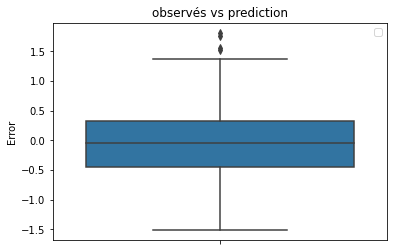

In [21]:
pred_train3 = sfmlr.predict(sfm_train)
pred_test3 = sfmlr.predict(sfm_test)

df_check3 = pd.DataFrame({'life_obsérvés': y_test, 'life_predits' : pred_test3}, 
             index=X_test.index)
df_check3['error'] = df_check3['life_predits']-df_check3['life_obsérvés']
df_check3.head()

sns.boxplot(y='error', data=df_check3)

plt.ylabel('Error')
plt.title('observés vs prediction')
plt.legend();

In [ ]:
# remarque peut etre faire une selection random car dt trié par ordre alphabéthique
# proposition faire 10 classes (une par note) = arrondi du life ladder en int
# LogGDP ou LifeExpectancy a suppr?

In [22]:
X_train_w = X_train.drop('LogGDP', axis=1)
X_test_w = X_test.drop('LogGDP', axis=1)

In [23]:
# Insérez votre code ici 
lr2 = LinearRegression()
lr2.fit(X_train_w, y_train)
 
print(lr2.score(X_train_w, y_train))
print(lr2.score(X_test_w, y_test))

0.7401776560571803
0.7561069040990452


In [24]:
scaler = preprocessing.StandardScaler().fit(X_train)

X_train_scaled = scaler.transform(X_train)

X_test_scaled = scaler.transform(X_test)

lrr = LinearRegression()
lrr.fit(X_train_scaled, y_train)

print(lrr.score(X_train_scaled, y_train))
print(lrr.score(X_test_scaled, y_test))

0.7710108643771048
0.7771413074027455


In [25]:
# Insérez votre code ici 
coeffs = list(lrr.coef_)
coeffs.insert(0, lrr.intercept_)

feats = list(data.columns)
feats.insert(0, 'intercept')

pd.DataFrame({'valeur estimée': coeffs}, index=feats)

,valeur estimée
intercept,5.446613
Year,-0.046322
LogGDP,0.450835
SocialSupport,0.206380
LifeExpectancy,0.219091
Freedom,0.085120
Generosity,0.067318
Corruption,-0.131832
PosAffect,0.200603
NegAffect,0.028541


No handles with labels found to put in legend.


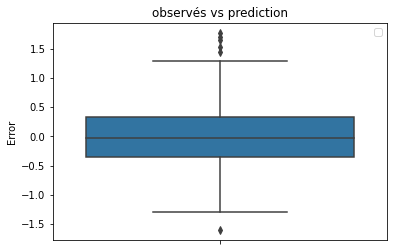

In [26]:
pred_train = lrr.predict(X_train_scaled)
pred_test = lrr.predict(X_test_scaled)

df_check2 = pd.DataFrame({'life_obsérvés': y_test, 'life_predits' : pred_test}, 
             index=X_test.index)
df_check2['error'] = df_check2['life_predits']-df_check2['life_obsérvés']

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

sns.boxplot(y='error', data=df_check2)

plt.ylabel('Error')
plt.title('observés vs prediction')
plt.legend();

In [27]:
df_check2.describe()

,life_obsérvés,life_predits,error
count,342.000000,342.000000,342.000000
mean,5.446947,5.431074,-0.015873
std,1.125526,0.997446,0.531100
min,2.905000,2.957655,-1.611837
25%,4.640250,4.705537,-0.352311
50%,5.303500,5.427393,-0.033109
75%,6.202000,6.076676,0.327917
max,7.889000,7.483463,1.774622
